# MVTec AD - Anomaly Detection Dataset for Industrial Inspection

> An open dataset for benchmarking anomaly detection methods on industrial inspection tasks.

In [44]:
#| default_exp explore_mvtec_data

In [45]:
#| hide
from nbdev.showdoc import *
import os

In [34]:
#| export
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#| export
def foo(): pass

In [24]:
DATA_PATH=os.getenv("DATA_PATH") 
MVTec_PATH=Path(DATA_PATH)/"mvtec"
print(f' Mv tech data path: {MVTec_PATH.exists()}')
print(f' Mv tech data path has following subfolders: {MVTec_PATH.ls().map(lambda x: x.name)}')
Transistor_PATH=MVTec_PATH/"transistor"
TRN_PATH=Transistor_PATH/"train"
GOOD_PATH=TRN_PATH/"good"
TST_PATH=Transistor_PATH/"test"
print(f' Transistor path: {Transistor_PATH.exists()}')
print(f' Transistor path has following subfolders: \n{Transistor_PATH.ls().map(lambda x: x.name)}')
print(f' Transistor train path: {TRN_PATH.exists()}')
print(f' Count number of images inside trianing  good transistor train path:\n {len(list(GOOD_PATH.ls()))}')
print(f' Transistor test path: {TST_PATH.exists()}')
print(f' Transistor train path has following subfolders: \n{TRN_PATH.ls().map(lambda x: x.name)}')
print(f' Transistor test path has following subfolders: \n{TST_PATH.ls().map(lambda x: x.name)}')

TST_GOOD_PATH=TST_PATH/"good"
DEFECT_PATH=[i for i in Path(TST_PATH).ls() if 'good' not in i.name]
print(f' Count number of defect images in transistor test path:\n {len(DEFECT_PATH)}')
print(f' Name of the defects are: \n{", ".join([i.name for i in DEFECT_PATH])}')
for i in DEFECT_PATH:
    print(f' Count number of images inside {i.name} defect path:\n {len(list(i.ls()))}')    


















 Mv tech data path: True
 Mv tech data path has following subfolders: ['transistor']
 Transistor path: True
 Transistor path has following subfolders: 
['test', 'train', 'readme.txt', 'license.txt', 'ground_truth']
 Transistor train path: True
 Count number of images inside trianing  good transistor train path:
 213
 Transistor test path: True
 Transistor train path has following subfolders: 
['good']
 Transistor test path has following subfolders: 
['damaged_case', 'good', 'misplaced', 'cut_lead', 'bent_lead']
 Count number of defect images in transistor test path:
 4
 Name of the defects are: 
damaged_case, misplaced, cut_lead, bent_lead
 Count number of images inside damaged_case defect path:
 10
 Count number of images inside misplaced defect path:
 10
 Count number of images inside cut_lead defect path:
 10
 Count number of images inside bent_lead defect path:
 10


In [27]:
DEFECT_PATH[0].parent.ls()

[Path('/home/hasan/Schreibtisch/projects/data/mvtec/transistor/test/damaged_case'), Path('/home/hasan/Schreibtisch/projects/data/mvtec/transistor/test/good'), Path('/home/hasan/Schreibtisch/projects/data/mvtec/transistor/test/misplaced'), Path('/home/hasan/Schreibtisch/projects/data/mvtec/transistor/test/cut_lead'), Path('/home/hasan/Schreibtisch/projects/data/mvtec/transistor/test/bent_lead')]

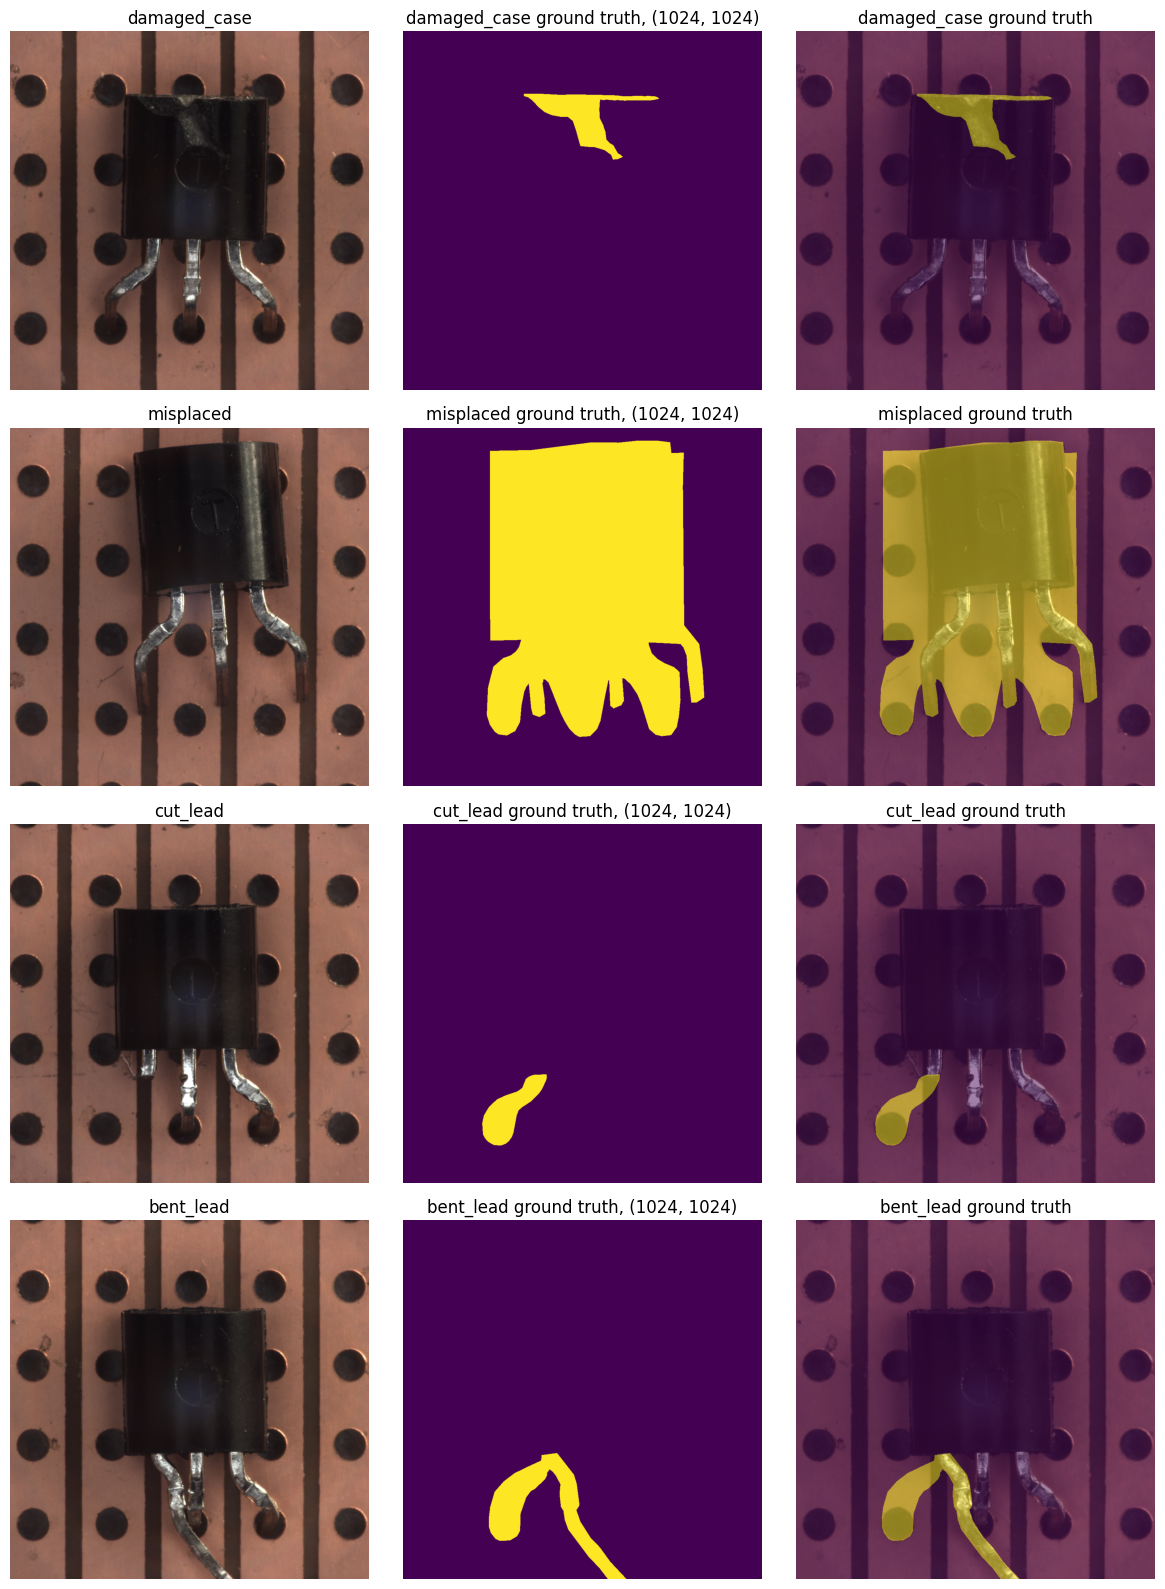

In [43]:

GROUND_TRUTH_PATH=DEFECT_PATH[0].parent.parent/"ground_truth"
fig, ax = plt.subplots(len(DEFECT_PATH), 3, figsize=(12, len(DEFECT_PATH)*4))
for idx, i in enumerate(DEFECT_PATH):
    images_ = Path(i).ls(file_exts=".png")
    img_ = images_[0]
    img = Image.open(img_)
    gt_path = Path(GROUND_TRUTH_PATH)/i.name/Path(img_).name.replace(".png", "_mask.png")
    gt_msk = Image.open(gt_path)
    ax[idx,0].imshow(img)
    ax[idx,0].set_title(f'{i.name}')
    ax[idx,0].axis('off')
    ax[idx,1].imshow(gt_msk)
    ax[idx,1].set_title(f'{i.name} ground truth, {gt_msk.size}')
    ax[idx,1].axis('off')
    ax[idx,2].imshow(img)
    ax[idx,2].imshow(gt_msk, alpha=0.5)
    ax[idx,2].set_title(f'{i.name} ground truth')
    ax[idx,2].axis('off')
plt.tight_layout()








In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()